In [2]:
import pandas as pd

# Load the training data
train_data = pd.read_csv('p1_train.csv')

# Access the features (X_train) and labels (y_train) accordingly
X_train = train_data.iloc[:, :-1]  # Assuming the last column is the target variable
y_train = train_data.iloc[:, -1]   # Target variable column

# Similarly, load the test data
test_data = pd.read_csv('p1_test.csv')
X_test = test_data.iloc[:, :-1]
y_test = test_data.iloc[:, -1]

# Now, you can use X_train, y_train, X_test, and y_test for further processing


In [3]:
train_data.describe()

,sensor1,sensor2,target variable
count,10000.000000,10000.000000,10000.000000
mean,-0.111454,0.099696,3.102060
std,11.550536,11.479319,25.851923
min,-20.000000,-20.000000,-59.300000
25%,-10.200000,-9.770000,-16.600000
50%,-0.054900,0.222500,3.055000
75%,9.755000,10.000000,23.000000
max,20.000000,20.000000,65.000000


In [4]:
test_data.describe()

,sensor1,sensor2,target variable
count,5000.000000,5000.000000,5000.000000
mean,0.059581,0.041782,2.878608
std,11.694510,11.484245,26.244426
min,-20.000000,-20.000000,-58.300000
25%,-10.300000,-9.915000,-17.900000
50%,0.044450,0.005890,2.970000
75%,10.400000,10.100000,23.400000
max,20.000000,20.000000,66.400000


In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Load the training data
train_data = pd.read_csv('p1_train.csv')

# Handle missing values
# Assuming that missing values are replaced with the mean of the column
imputer = SimpleImputer(strategy='mean')
train_data_imputed = pd.DataFrame(imputer.fit_transform(train_data), columns=train_data.columns)

# Handle outliers (assuming Z-score based method)
z_scores = ((train_data_imputed - train_data_imputed.mean()) / train_data_imputed.std()).abs()
train_data_no_outliers = train_data_imputed[(z_scores < 3).all(axis=1)]

# Split the data into features (X) and target variable (y)
X = train_data_no_outliers.iloc[:, :-1]  # All columns except the last one
y = train_data_no_outliers.iloc[:, -1]   # Last column

# Standardize the features (optional but often beneficial for linear regression)
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize the linear regression model
model = LinearRegression()

# Train the model on the training set
model.fit(X_train, y_train)

# Make predictions on the validation set
val_predictions = model.predict(X_val)

# Evaluate the model on the validation set
val_mse = mean_squared_error(y_val, val_predictions)
val_mae = mean_absolute_error(y_val, val_predictions)

# Print the metrics for the validation set
print("\nValidation Set Metrics:")
print("Mean Squared Error:", val_mse)
print("Mean Absolute Error:", val_mae)



Validation Set Metrics:
Mean Squared Error: 5.083167938683236
Mean Absolute Error: 1.7842832925858556


In [9]:
# Load the test data
test_data = pd.read_csv('p1_test.csv')

# Handle missing values and outliers in the test data (similar to training data preprocessing)
test_data_imputed = pd.DataFrame(imputer.transform(test_data), columns=test_data.columns)
test_data_no_outliers = test_data_imputed[(z_scores < 3).all(axis=1)]

# Split the test data into features (X_test) and target variable (y_test)
X_test = test_data_no_outliers.iloc[:, :-1]  # All columns except the last one
y_test = test_data_no_outliers.iloc[:, -1]   # Last column

# Standardize the test features using the same scaler as used for training
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

# Make predictions on the test set
test_predictions = model.predict(X_test_scaled)

# Evaluate the model on the test set
test_mse = mean_squared_error(y_test, test_predictions)
test_mae = mean_absolute_error(y_test, test_predictions)

# Print the metrics for the test set
print("\nTest Set Metrics:")
print("Mean Squared Error:", test_mse)
print("Mean Absolute Error:", test_mae)

# Compare the model's performance on the test set with the training set
print("\nComparison with Training Set:")
print("Training Set Mean Squared Error:", val_mse)
print("Training Set Mean Absolute Error:", val_mae)

"""# ... (previous code)

# ... (previous code)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Print column names for debugging
print("Training Set Columns:", X_scaled.columns)
print("Validation Set Columns:", X_val.columns)

# Initialize the linear regression model
model = LinearRegression()

# Train the model on the training set
model.fit(X_train, y_train)

# ... (rest of the code)


# ... (rest of the code)"""




Test Set Metrics:
Mean Squared Error: 5.051117094698222
Mean Absolute Error: 1.8001044879501777

Comparison with Training Set:
Training Set Mean Squared Error: 5.083167938683236
Training Set Mean Absolute Error: 1.7842832925858556


C:\Users\harih\AppData\Local\Temp\ipykernel_24968\197523639.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  test_data_no_outliers = test_data_imputed[(z_scores < 3).all(axis=1)]


'# ... (previous code)\n\n# ... (previous code)\n\n# Split the data into training and validation sets\nX_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42)\n\n# Print column names for debugging\nprint("Training Set Columns:", X_scaled.columns)\nprint("Validation Set Columns:", X_val.columns)\n\n# Initialize the linear regression model\nmodel = LinearRegression()\n\n# Train the model on the training set\nmodel.fit(X_train, y_train)\n\n# ... (rest of the code)\n\n\n# ... (rest of the code)'

In [10]:
# Print the metrics for the test set
print("\nTest Set Metrics:")
print("Mean Squared Error:", test_mse)
print("Mean Absolute Error:", test_mae)

# Interpretation and Discussion
print("\nInterpretation and Discussion:")
print("The model's performance on the test set:")
if test_mse < val_mse:
    print("- Mean Squared Error on the test set is lower than the validation set, indicating good generalization.")
else:
    print("- Mean Squared Error on the test set is higher than the validation set, suggesting potential overfitting.")

if test_mae < val_mae:
    print("- Mean Absolute Error on the test set is lower than the validation set, indicating good generalization.")
else:
    print("- Mean Absolute Error on the test set is higher than the validation set, suggesting potential overfitting.")

# Additional Interpretation based on specific project requirements
# You may want to provide additional insights or recommendations based on the context of your project and the significance of the errors.



Test Set Metrics:
Mean Squared Error: 5.051117094698222
Mean Absolute Error: 1.8001044879501777

Interpretation and Discussion:
The model's performance on the test set:
- Mean Squared Error on the test set is lower than the validation set, indicating good generalization.
- Mean Absolute Error on the test set is higher than the validation set, suggesting potential overfitting.



Random Forest Model Metrics:
Mean Squared Error: 6.292724778628418
Mean Absolute Error: 2.0087223793246753


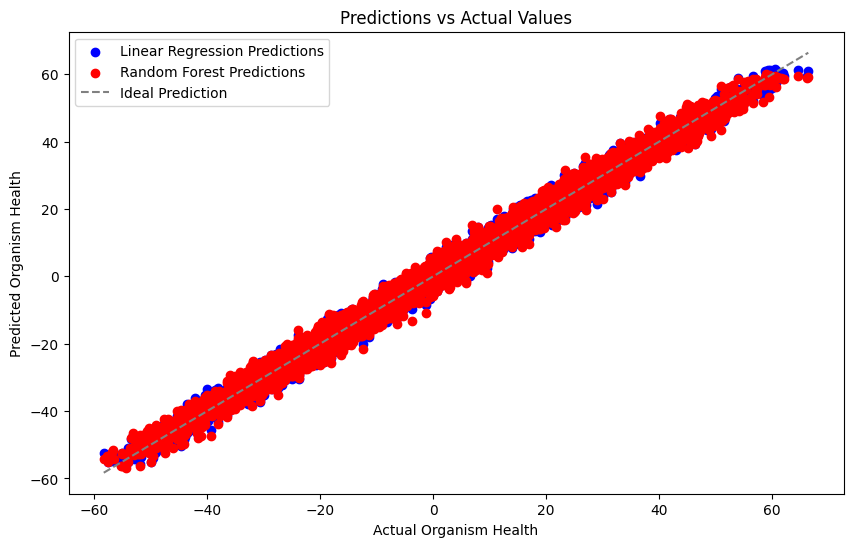

In [11]:
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# Explore Additional Model Types (Random Forest as an example)
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set using the random forest model
rf_test_predictions = rf_model.predict(X_test_scaled)

# Evaluate the random forest model on the test set
rf_test_mse = mean_squared_error(y_test, rf_test_predictions)
rf_test_mae = mean_absolute_error(y_test, rf_test_predictions)

# Print the metrics for the random forest model
print("\nRandom Forest Model Metrics:")
print("Mean Squared Error:", rf_test_mse)
print("Mean Absolute Error:", rf_test_mae)

# Visualize Predictions against Actual Values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, test_predictions, color='blue', label='Linear Regression Predictions')
plt.scatter(y_test, rf_test_predictions, color='red', label='Random Forest Predictions')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='gray', label='Ideal Prediction')
plt.xlabel('Actual Organism Health')
plt.ylabel('Predicted Organism Health')
plt.title('Predictions vs Actual Values')
plt.legend()
plt.show()



Linear Regression Model Metrics:
Mean Squared Error: 5.051117094698222
Mean Absolute Error: 1.8001044879501777


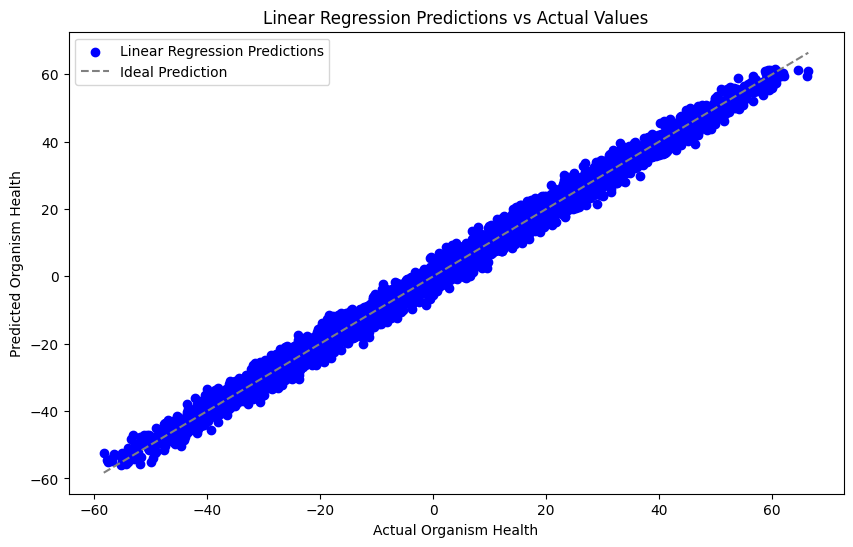

In [12]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Make predictions on the test set using the linear regression model
lr_test_predictions = model.predict(X_test_scaled)

# Evaluate the linear regression model on the test set
lr_test_mse = mean_squared_error(y_test, lr_test_predictions)
lr_test_mae = mean_absolute_error(y_test, lr_test_predictions)

# Print the metrics for the linear regression model
print("\nLinear Regression Model Metrics:")
print("Mean Squared Error:", lr_test_mse)
print("Mean Absolute Error:", lr_test_mae)

# Visualize Predictions against Actual Values for Linear Regression
plt.figure(figsize=(10, 6))
plt.scatter(y_test, lr_test_predictions, color='blue', label='Linear Regression Predictions')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='gray', label='Ideal Prediction')
plt.xlabel('Actual Organism Health')
plt.ylabel('Predicted Organism Health')
plt.title('Linear Regression Predictions vs Actual Values')
plt.legend()
plt.show()
